### **CSE - 510 - Introduction to Reinforcement Learning (Fall 2019)**

---

**Instructor - Alina Vereshchaka**

# Project 1 - Building Reinforcement Learning Environment

### **Author - Vishva Nitin Patel**

---
Department - Computer Science and Engineering

UB Person Number - 50318625

## ABSTRACT:

The aim of this project is to understand, explore and get an experience of building reinforcement learning environments, following the OpenAI Gym standards.

The project consists of building deterministic and stochastic
environments that are based on Markov decision process, and applying tabular method to solve them.

I have used the Q-Learning algorithm to help train our agent to avoid obstacles within the environment, and simultaneously maximize the rewards the agent gets to reach the goal.

## Building a deterministic environment and using Q - Learning to solve it:

Defining a Deterministic Environment, that has more than one state and more than one action.

### The Problem Statement:

For this project, I have chosen to work on the 'The Frozen lake problem'. It is a well known reinforcement learning problem which makes use of the grid-world implementation.

An agent located in one position (top left corner in this case) aims to reach the goal (rightmost bottom corner of the grid).Essentially to the other side of the lake. But the lake environment (Grid-world), is filled with obstacles in the form of grids of freezing cold water.
The game ends when the agent reaches the goal or falls into one of the holes of freezing water and dies.

In the original version of this game, a reward of 1 was granted if the agent reached the goal, -1 if agent falls to a hole and dies, and there were no rewards associated with the movement of the agent towards its goal. Further details about the 'Frozen Lake problem' can be found at: https://gym.openai.com/envs/FrozenLake-v0/

In this project, in order to incentivize the agent for making a 'good decision' of moving towards the goal (by moving in the correct direction - left / right / up / down), I have introduced rewards at each step:

• 150 for reaching the goal

• -150 if the agent falls into a hole and the episode terminates

• -1 if the agent stays at the same place or it moves away from the goal

• +5, if the agent moves towards the goal

To emulate the 'Stochastic' environment, the ice may sometime be slippery and hence, the agent might skid to some direction other than his intended direction.

### Using Reinforcement Learning to solve this problem:

Reinforcement Learning is a branch of Machine Learning that deals with methods of mapping the situations/states to actions — in order to maximize a numerical reward signal.

The agent is not told which actions to take, but instead he must discover which actions lead to the most reward by actually trying those actions.

The idea behind Reinforcement Learning is that an agent will learn from the environment by interacting with it and receiving rewards for performing actions.

• Agent receives state 'S' from the Environment (In this case the State within the Frozen Lake Environment)

• Based on that state, the agent takes an action 'A' (In this case, move left / right / up / down)

• Environment transitions to a new state 'S+1' (new frame)

• Environment gives some reward 'R' to the agent. (In this case +150,+5,-1,-150 depending on the action taken)

• This RL loop results into a sequence of state, action and reward sets.

• The goal of the agent is to maximize the expected 'cumulative reward'.

### Markov Decision Process:
Markov Decision Process is an approach that is only concerned with the next State 'S+1' and the decision of reaching the next state is solely based on the current State at the current time.

### Q learning Algorithm:
Q-learning is a model-free reinforcement learning algorithm. The goal of this algorithm is to learn a policy which tells the agent what action to take under what circumstances.

It does not require a model of the environment, hence called "model-free". It can handle problems with stochastic transitions and rewards, without requiring adaptations.

This process is done to maximize reward for each step or episode to find the optimal solution and it runs until the episode ends after which it may start again or replay the steps taken for the next episode. Here 𝛾 is the Discounting factor which lies in the range [0,1]

When we try to train our agent using Q learning, the Q learning algorithm makes use of the Q table to tabulate the rewards at each step, which in turn helps the agent choose between exploration (fining next steps) and exploitation (using the knowledge gained so far to take the best possible actions). 

The function 'Q(state, action) returns the expected future reward of that action at that state. This function can be computed using Q-Learning, which iteratively updates Q(S,A) using the Bellman equation.


Initially we explore the environment and update the Q-Table. When the Q-Table is ready, the agent will start to exploit the environment and start taking better actions.

We shall make use of the Q - Learning algorithm to solve this problem.

### Implementation:

In [0]:
#Importing all Libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym #Open source interface to reinforcement learning tasks, it pprovides the environment, we write the algorithm...
from gym import spaces #we willwork with action_space and Observaion_space
import time
import random
from google.colab import widgets
from matplotlib import colors

In [0]:
print_grid = widgets.Grid(2, 2) #Initializing & testing the grid

,
,


### Creating the RL environment

The environment I am trying to build is a 4*4 grid world with the following attributes:

• It’s a deterministic / stochastic environment as per the parameters passed.

• The agent is positioned at (0,0)

• The holes/obstacles are positioned at (1,1), (1,3) and (2,3)

• The goal is positioned at (3,3)


    Markov Decision Process is defined by a 4-tuple which contains:

    The State Set (S)
    The Action Set (A)
    Probability Function (P)
    Rewards (R)

  
The environment is constructed by the class Environment and defined containing a few functions:

    initialisation - initialises the environment parameters - namely observation space and action space.
    Observation space is the number of observable states that our environment provides. Action space defines the number of actiosn that can be taken on the enviornment - namely up, down, left, right movements.

    reset - Resets the environment and returns a random initial state if the random_start is set while initializing the environment

    steps - function that defines the essence of the environment. It contains the decision making unit of the environment. A step function takes in an 'action' and decides what to do next or where to go.

  
    Steps returns the following four values:

    observation (object): an environment-specific object representing your observation of the environment.

    reward (float): amount of reward achieved by the previous action.

    done (boolean): whether it’s time to reset the environment again.

    info (dict): diagnostic information useful for debugging.
    
In step function based on the action received, we get the possible next positions from the transition table we created while initializing the environment.

If our environment is deterministic, we only get one possible next state from the transition table with associated probability of 1.0 but if our environment is stochastic we receive multiple states that the agent can go to due to slipperiness with associated probabilities of going to each state (Right and Down have been given higher probability).

We then iterate over these possible states and pick one state randomly. The state which has the higher probability has more chance of getting selected and hence it is more probable that the agent will move in that direction.

    Based on the this next state we calculate the rewards associated with moving to this next state or position based on the values defined above

    render - Renders one frame of the environment

    get_current_state - returns the current position of the agent.

    get_state - returns state of the requested agent

    is_over - function to check if episode is over - whether agent ahs reached goal or fallen into a hole.

    increment - takes an action and naviagtes to the next state. Returns new state position. (0-down, 1-up, 2-right, 3-left)

    create_transition_table - creates a probability transition matrix 4 x 16 grids in count to store probabilities associated with each movement.

There are two types of actions that are taken to determine the next states based on whether the environment is deterministic or stochastic.

If the environment is deterministic then for each action there is only one possible next state which has a probability of 1.0 associated with it.If the environment is stochastic, then for each possible action encountered it is possible that the agent can move in other directions as well if the ice is slippery. Hence, in our case we assigned probability of 0.7 to the movements RIGHT and DOWN since they move the agent closer to the goal, and probabilty 0.2 to other directions since moving in those directions takes the agent further from the goal. For every state and action, we store all the possible next states if the agent might have gone in a different direction.

In [0]:
class Environment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self,deterministic=True,maxsteps=16,random_start=False):   #Init function - deterministic environment and fixed starting point
        self.max_timesteps = maxsteps
        self.deterministic = deterministic
        self.random_start = random_start
        self.observation_space = spaces.Discrete(16) 
        self.action_space = spaces.Discrete(4)
        self.reset()
        self.p_table = self.create_transition_table() 
        
            
    def reset(self):               #Reset function
        self.time_step = 0
        self.state = np.zeros((4,4)) 
        self.goal_pos = [3, 3]     #Assigning fixed positions for goal and holes
        self.hole1 = [1, 1]
        self.hole2 = [1, 3]
        self.hole3 = [2, 3]
        self.done = False
        
        self.state[tuple(self.goal_pos)] = 0.5      #assigning values in the grid for visual representation
        self.state[tuple(self.hole1)] = 0.2
        self.state[tuple(self.hole2)] = 0.2
        self.state[tuple(self.hole3)] = 0.2
        
        agent_pos = [0, 0] 
        
        if self.random_start == False:
          agent_pos = [0, 0]   # Assigning agent position at top left corner, in case of a deterministic environment
        else:
          while True:          # Assigning agent position at any random position inside the grid, in case of a stochastic environment
            x = np.random.randint(0, 3)
            y = np.random.randint(0, 3)
            pos = [x, y]
            if np.array_equal(pos,self.hole1) or np.array_equal(pos,self.hole2) or np.array_equal(pos,self.hole3):
              continue
            else:
              agent_pos = [x, y]
              break    
         
        self.agent_pos = agent_pos
        self.state[tuple(self.agent_pos)] = 1
        observation = np.argmax(self.state.flatten())
        return observation
             
    def steps(self, action):  #Steps Function
        assert self.action_space.contains(action) #assert checks that the action_space is not empty
        self.state[tuple(self.agent_pos)] = 0.0 #fixing starting point          
        startPos = self.agent_pos
        current_state = self.get_current_state(self.agent_pos)
        possible_states = self.p_table[current_state][action]
        prob = np.array([x[0] for x in possible_states])
        prob = prob/sum(prob)
        next_state_index = np.random.choice(len(prob), p=prob) 
        self.agent_pos = possible_states[next_state_index][1]  
        
        prev_distance = np.square(self.goal_pos[1]-startPos[1])+np.square(self.goal_pos[0]-startPos[0])
        new_distance = np.square(self.goal_pos[1]-self.agent_pos[1])+np.square(self.goal_pos[0]-self.agent_pos[0])
        
        #Setting up rewards
        reward = -1            # if the agent is stuck  or is moving away from the goal, reward deducted by 1
        done = False
        if np.array_equal(self.agent_pos,self.goal_pos):
          reward = 150         # if agent reaches the goal_pos, reward +150 and end episode
          done = True
        elif np.array_equal(self.agent_pos,self.hole1) or np.array_equal(self.agent_pos,self.hole2) or np.array_equal(self.agent_pos,self.hole3) :
          reward = -150       # if agent dies by getting into the hole, reward deducted by 150, and end episode
          done = True 
        elif new_distance<prev_distance:       # if agent moves closer to goal reward +5
          reward = 5        
        
        self.state[tuple(self.agent_pos)] = 1  
        
        self.time_step += 1        
        if self.time_step >= self.max_timesteps or done:
          self.done = True
        else:
          self.done = False
        
        info = possible_states
        
        observation = np.argmax(self.state.flatten())    
        return observation, reward, self.done, info
        
    def render(self):                                         #Render Function
        plt.imshow(self.state)
        
    def get_current_state(self,currPos):                      #get_current_state function returns position
        return currPos[0]*self.state.shape[1] + currPos[1]
      
    def get_state(self):                                      #Returns environment state
      return self.state

    def is_over(self,pos):                                    # is_over determines if agent has reached the goal / hole 
      if np.array_equal(pos,self.goal_pos) or np.array_equal(pos,self.hole1) or np.array_equal(pos,self.hole2) or np.array_equal(pos,self.hole3):
        return True
      
    def increment(self,action,pos):                           # increment function to return future pos of next state
      fpos = pos 
      if action == 0 and pos[0] < 3:      
           fpos[0] += 1                     # 0- down movement; agent position is incremented by 1 in the downward direction
      if action == 1 and pos[0] > 0:
         fpos[0] -= 1                       # 1- up movement; agent position is decremented by 1 in the upward direction
      if action == 2 and pos[1] < 3:
         fpos[1] += 1                       # 2- right movement; agent position is incremented by 1 in the right direction
      if action == 3 and pos[1] > 0:
         fpos[1] -= 1                       # 3- left movement; agent position is decremented by 1 in the left direction
      return  fpos
      
    def create_transition_table(self):      #Probability Transition matrix containing the probabilities associated with each step                                       
      p_table = {s : {a : [] for a in range(4)} for s in range(16)}
      for i in range(4):
          for j in range(4):
              st = self.get_current_state([i,j])
              for action in range(4):
                  temp = p_table[st][action]
                  if self.is_over([i,j]):              # checks if agent is at hole/goal position
                      temp.append((1.0, [i,j]))
                  else:
                      if self.deterministic:           # if the environment is deterministic        
                          fpos = self.increment(action,[i,j])
                          temp.append((1.0, fpos))
                      else:                 # if environment is stochastic
                          p = 1
                          for A in [(action-1)%4, action, (action+1)%4]: #for A in [0,1,2,3]:
                              fpos = self.increment(A,[i,j])
                              if A == 2 or A == 0:        # for down and right movements, probability = 0.7
                                temp.append((0.7, fpos))
                              else:
                                temp.append((0.2, fpos))  # for up and left movements, probability = 0.2 
      return p_table

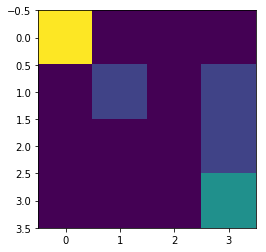

In [0]:
# Testing to see if the environment looks and behaves as expected

env = Environment(deterministic=True) # We want our environment to be deterministic
obs = env.reset() # We have to reset the environment to its initial state before starting a new episode
env.render() # rendering the environment

### Now implementing the Determinisic Environment...

Reward: 5


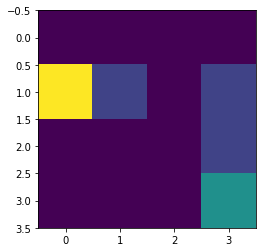

In [0]:
#Testing to see if our agent can move down as instructed
action = 0
observation, reward, done, info = env.steps(action) # Calling the steps function with action=0 (down movement)
env.render()
print('Reward:', reward) # Rewarding the agent 5 points for moving closer to goal



### Now creating & training the Q-Learning agent...



Q-learning depends on the concepts of exploitation and exploration. 

Exploitation makes the best decision given the current information while exploration deals with gathering more information. The best long–term strategy may sometimes require short–term sacrifices. Here  the overall goal of the agent would be to put togather enough information to make the best overall decision(s).

The reward calculation at each step is recorded by tabulating it and is referred for calculation of the next step. With the help of the Q table which is a lookup table, the maximum expected future rewards are calculated for action at each state.

In the Q-Table, the columns are the actions and the rows are the states. The values in the Q table are calculated by the Q- Learning algorithm.

The RL model used here is based on the epsilon-decreasing strategy. This strategy explores the probability epsilon, and exploits the probability 1 — epsilon. The Epsilon decreases over time.


In [0]:
class Q_learning_agent:
  def __init__(self, env, learning_rate, gamma):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
    self.learning_rate = learning_rate
    self.gamma = gamma
    self.q_table = np.zeros((self.observation_space.n, self.action_space.n))   #defining Q_table
  
  def steps(self, state, tradeoff, epsilon):
    # Exploiting biggest Q Value for this state
    if tradeoff > epsilon:
      action = np.argmax(self.q_table[state,:])
    # Else Exploration
    else:
      action = self.action_space.sample()
    return action
  
  def update(self, state, action, new_state, reward):
    self.q_table[state, action] = self.q_table[state, action] + ( self.learning_rate * (reward + self.gamma * np.max(self.q_table[new_state, :]) - self.q_table[state, action]) )
    
  def get_Q_table(self):
    return self.q_table

In [0]:
#Defining the exploration parameters
q_agent = Q_learning_agent(env, learning_rate=0.95, gamma=0.96)
total_episodes = 5000 # training for 5000 episodes

#Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005            # Exponential decay rate for exploration prob

In [0]:
q_agent.q_table.shape   # dimensions of the q_table

(16, 4)

Starting state


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

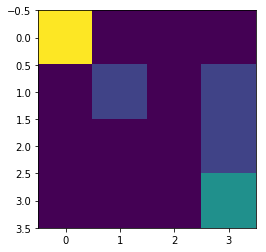

<IPython.core.display.Javascript object>

Episode Num: 1


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

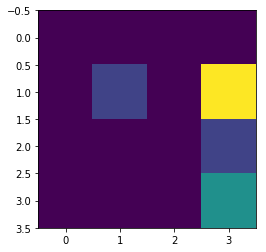

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  1. ]
 [0.  0.  0.  0.2]
 [0.  0.  0.  0.5]]
Episode Num: 501


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

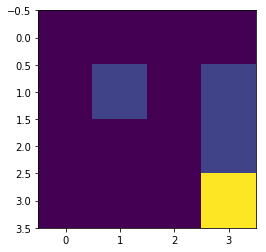

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode Num: 1001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

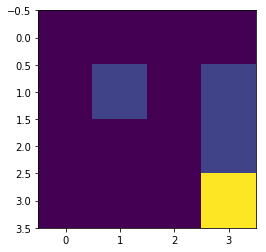

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode Num: 1501


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

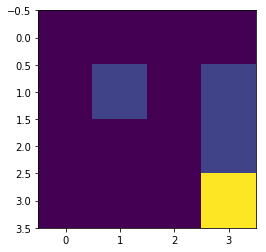

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode Num: 2001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

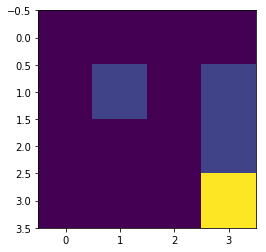

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode Num: 2501


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

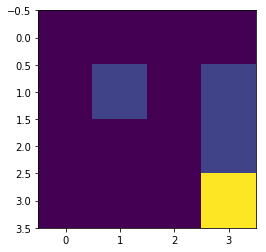

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode Num: 3001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

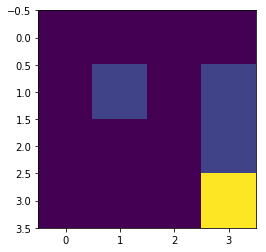

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode Num: 3501


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

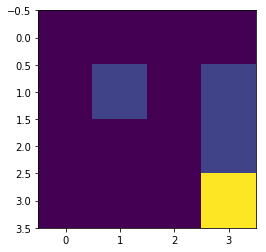

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode Num: 4001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

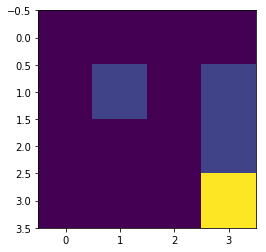

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode Num: 4501


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

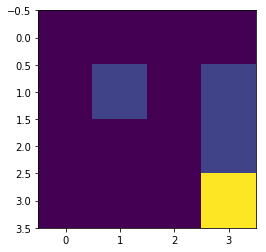

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]


In [0]:
"""
I have used collab widget to print grids for every 500 episode. For every episode that does not meet it's goal, epsilon are recalibrated.
The output shows that the agent has successfully found the way to the goal from episode 500 onwards.
"""
print("Starting state")
rewards = []
epsilons = []
state = env.reset()
print_grid = widgets.Grid(1, 1)
with print_grid.output_to(0, 0):
  print_grid.clear_cell()
  env.render()
time.sleep(0.25)

for episode in range(total_episodes):
  state = env.reset()
  total_rewards = 0
  done = False
  
  if episode % 500 == 0:
    print ('Episode Num:', episode+1)  
    
  while not done:
    tradeoff = random.uniform(0, 1)
    action = q_agent.steps(state, tradeoff, epsilon)
    new_state, reward, done, info = q_agent.env.steps(action)
    q_agent.update(state, action, new_state, reward)    
    total_rewards += reward   
    state = new_state
    
  if episode % 500 == 0:
    print_grid = widgets.Grid(1, 1)
    with print_grid.output_to(0, 0):
      print_grid.clear_cell()
      env.render()
    print(q_agent.env.get_state())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
  epsilons.append(epsilon)
  rewards.append(total_rewards)

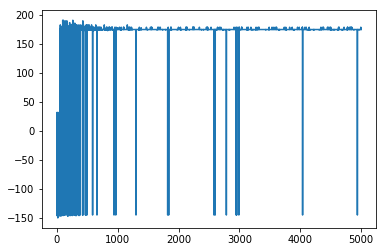

In [0]:
"""
Plotting the Rewards Graph:
Graph shows the rewards obtained for each episode.
"""
plt.plot(rewards)

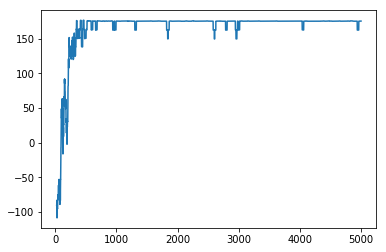

In [0]:
"""
Plotting the Rolling mean of rewards:
"""
df = pd.DataFrame(rewards, columns=['r'])
mean_roll = df['r'].rolling(window=25).mean()
plt.plot(mean_roll)

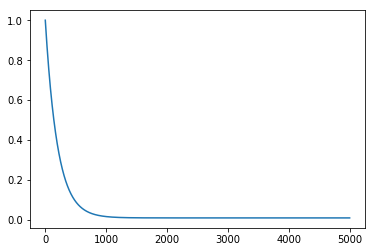

In [0]:

"""Plotting the Epsilon graph:
Initially it has high values as we want to explore the environment and we end up taking random actions,
but gradually the trend decreases as we start exploiting the information we have obtained in the Q - table.
"""
plt.plot(epsilons)

### The Q - Table for Determininstic Environment...

In [0]:
q_df = pd.DataFrame(q_agent.q_table, columns=['right', 'left', 'up' ,'down'])
q_df

,right,left,up,down
0,145.384317,138.568945,138.026187,138.568945
1,-150.000000,132.026156,131.682363,138.568945
2,39.305580,35.901631,30.530590,132.026139
3,-149.999063,24.492000,24.468912,35.495445
4,146.233664,138.568945,-150.000000,139.384317
5,0.000000,0.000000,0.000000,0.000000
6,148.039349,121.504095,-149.981250,-149.999063
7,0.000000,0.000000,0.000000,0.000000
8,147.118400,139.384317,147.118400,140.233664
9,148.040000,-150.000000,148.040000,140.233664


Episode # 1


""


Probabilities and Possible positions for step 1: [(1.0, [1, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 2: [(1.0, [2, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 3: [(1.0, [3, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 4: [(1.0, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 5: [(1.0, [3, 2])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 6: [(1.0, [3, 3])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No. of steps taken: 6 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

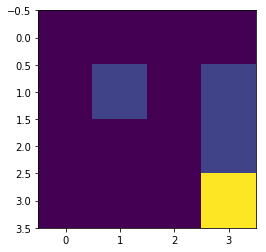

<IPython.core.display.Javascript object>

Episode # 2


""


Probabilities and Possible positions for step 1: [(1.0, [1, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 2: [(1.0, [2, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 3: [(1.0, [3, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 4: [(1.0, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 5: [(1.0, [3, 2])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probabilities and Possible positions for step 6: [(1.0, [3, 3])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No. of steps taken: 6 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

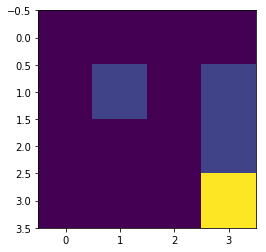

<IPython.core.display.Javascript object>

In [0]:
"""Depicting the Animation that shows the 2 episodes from all 10000 episodes that exhibit maximum learning curve"""
for episode in range(2):
  state = env.reset()
  total_reward = 0
  done = False
  print("Episode #",episode+1)
  nsteps = 0
  print_grid = widgets.Grid(1, 1)
  while not done:
    action = q_agent.steps(state, tradeoff, epsilon)
    new_state, reward, done, info = q_agent.env.steps(action)
    
    state = new_state
    nsteps+=1
    print("Probabilities and Possible positions for step "+str(nsteps)+":",info)
    with print_grid.output_to(0, 0):
      print_grid.clear_cell()
      env.render()
    time.sleep(1)
  print("No. of steps taken:",nsteps,"\n")
  
  with print_grid.output_to(0, 0):
    print_grid.clear_cell()
    env.render()
  time.sleep(1)

## Building a Stochastic environment and using Q - Learning to solve it:

In the Stochastic environment, the difference is that the lake may be slippery in nature, hence the agent may not be able to move in the intended direction and could move in a random fashion.

In order to go ahead with this implementation, I will set the deterministic flag to false, hence making it a Stochastic implementation.

random_start flag is set to true, which implies random position assignment has been switched on.

maxsteps has been set to 20, since the environment is slippery and the agent can make a lot of confused/random movements.

(0 - down

1 - up

2 - right

3 - left)

Initial State: 1


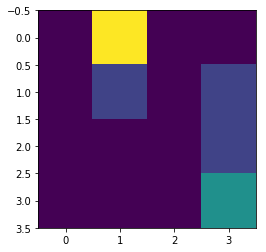

In [0]:
env = Environment(deterministic=False,maxsteps=20,random_start=True)
obs = env.reset()
print("Initial State:",obs)
env.render()

In [0]:
#Note that the Q - learning agents have been defined in the same manner for both - deterministic and stochastic implementations
class Q_learning_agent:
  def __init__(self, env, learning_rate, gamma):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
    self.learning_rate = learning_rate
    self.gamma = gamma
    self.q_table = np.zeros((self.observation_space.n, self.action_space.n))
  
  def steps(self, state, tradeoff, epsilon):
    # Exploit (the biggest Q value for this state)
    if tradeoff > epsilon:
      ac = np.argmax(self.q_table[state,:])
    # Else doing a random choice - exploration
    else:
      ac = self.action_space.sample()
    return ac
  
  def update(self, state, action, new_state, reward):   #update q table 
    self.q_table[state, action] = self.q_table[state, action] + ( self.learning_rate * (reward + self.gamma * np.max(self.q_table[new_state, :]) - self.q_table[state, action]) )
    
  def get_Q_table(self):
    return self.q_table

In [0]:
#Defining Exploration Parameters
q_agent = Q_learning_agent(env, learning_rate=0.95, gamma=0.96)
total_episodes = 10000

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005            # Exponential decay rate for exploration prob

Episode No: 1


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

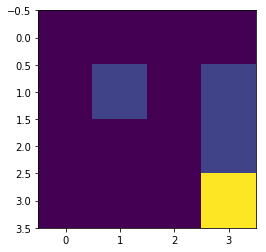

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 1001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

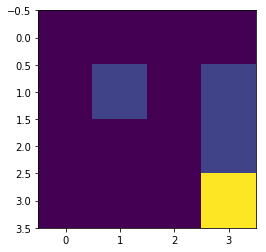

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 2001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

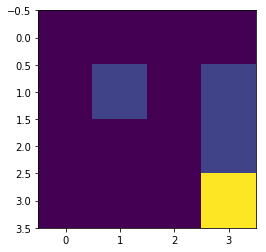

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 3001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

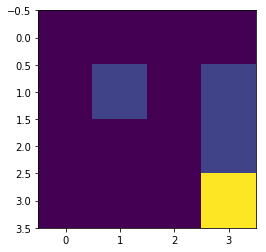

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 4001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

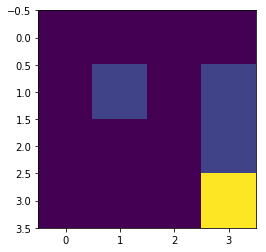

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 5001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

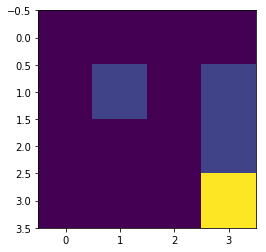

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 6001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

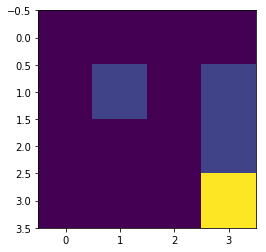

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 7001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

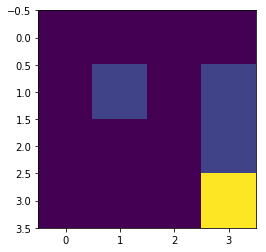

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 8001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

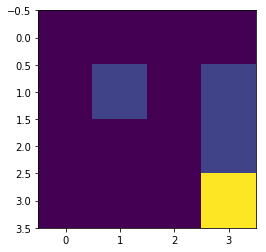

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]
Episode No: 9001


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

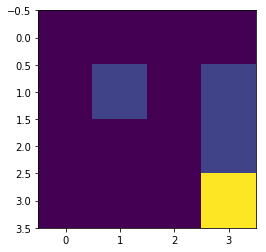

<IPython.core.display.Javascript object>

[[0.  0.  0.  0. ]
 [0.  0.2 0.  0.2]
 [0.  0.  0.  0.2]
 [0.  0.  0.  1. ]]


In [0]:
"""
One can see that the agent has reached the goal in some cases but at the same time it has'nt been able to do so in certain other cases.
This can be due to the distribution of probabilities in its movement (i.e. Stochastic Environment).
I have used 0.7 as a probability for directions, to make it easier to reach the goal.
In a stochastic model, the chance of showing untrained behaviour is huge since we are randomising the agent's position.
Agent shows better behavior with a fixed position.
"""
rewards = []
epsilons = []
state = env.reset()

time.sleep(0.25)

for episode in range(total_episodes):
  state = env.reset()
  total_rewards = 0
  done = False
  
  if episode % 1000 == 0:
    print ('Episode No:', episode+1)
    
  while not done:
    tradeoff = random.uniform(0, 1)
    action = q_agent.steps(state, tradeoff, epsilon)
    new_state, reward, done, info = q_agent.env.steps(action)
    
    #similar to stochastic gradient descent
    q_agent.update(state, action, new_state, reward)
    
    total_rewards += reward
    
    state = new_state
    

  if episode % 1000 == 0:
    print_grid = widgets.Grid(1, 1)
    with print_grid.output_to(0, 0):
      print_grid.clear_cell()
      env.render()
    print(q_agent.env.get_state())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
  epsilons.append(epsilon)
  rewards.append(total_rewards)

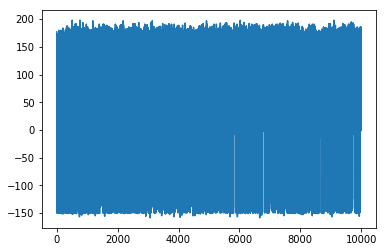

In [0]:
"""Plotting the Rewards Graph: 
It shows a little more eccentricity as compared to the rewards graph for the deterministic environment.
"""
plt.plot(rewards)

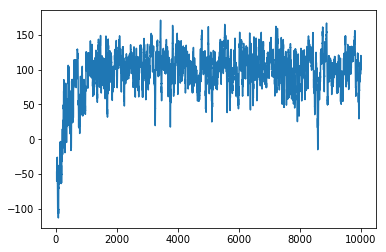

In [0]:
"""Plotting the Rolling mean of all rewards:"""
df = pd.DataFrame(rewards, columns=['r'])
rolling_mean = df['r'].rolling(window=25).mean()
plt.plot(rolling_mean)

### The Q - Table for Stochastic Environment...

In [0]:
q_df = pd.DataFrame(q_agent.q_table, columns=['right', 'left', 'up' ,'down'])
q_df

,right,left,up,down
0,137.867751,45.518722,48.928301,33.017881
1,-137.470682,-141.082658,29.807683,-140.986618
2,-111.913348,-111.389034,31.495814,-93.371217
3,-3.827018,3.114458,27.980470,-150.000000
4,138.940056,-135.817832,-149.999916,-136.963658
5,0.000000,0.000000,0.000000,0.000000
6,37.279541,-149.998939,-149.999919,-149.999914
7,0.000000,0.000000,0.000000,0.000000
8,146.737138,-76.265523,-80.581944,104.169129
9,-135.133654,108.829761,-135.205819,132.136644


EPISODE: 1


""


Probability and Possible position for step 1: [(0.7, [2, 2]), (0.2, [2, 0]), (0.7, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 2: [(0.7, [3, 2]), (0.2, [3, 0]), (0.7, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 3: [(0.7, [3, 2]), (0.2, [3, 0]), (0.7, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 4: [(0.2, [2, 2]), (0.7, [3, 3]), (0.2, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 5: [(0.7, [3, 2]), (0.2, [3, 0]), (0.7, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 6: [(0.7, [3, 2]), (0.2, [3, 0]), (0.7, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 7: [(0.7, [3, 2]), (0.2, [3, 0]), (0.7, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 8: [(0.7, [3, 2]), (0.2, [3, 0]), (0.7, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 9: [(0.7, [3, 2]), (0.2, [3, 0]), (0.7, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 10: [(0.2, [2, 2]), (0.7, [3, 3]), (0.2, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No of steps taken: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

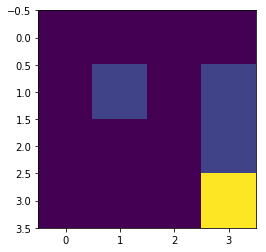

<IPython.core.display.Javascript object>

EPISODE: 2


""


Probability and Possible position for step 1: [(0.2, [0, 0]), (0.7, [1, 0]), (0.2, [0, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 2: [(0.2, [1, 0]), (0.7, [2, 0]), (0.2, [0, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 3: [(0.2, [2, 0]), (0.7, [3, 0]), (0.2, [1, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 4: [(0.2, [2, 0]), (0.7, [3, 1]), (0.2, [3, 0])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 5: [(0.7, [3, 2]), (0.2, [3, 0]), (0.7, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 6: [(0.2, [2, 2]), (0.7, [3, 3]), (0.2, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 7: [(0.7, [3, 2]), (0.2, [3, 0]), (0.7, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 8: [(0.7, [3, 2]), (0.2, [3, 0]), (0.7, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 9: [(0.2, [2, 2]), (0.7, [3, 3]), (0.2, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No of steps taken: 9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

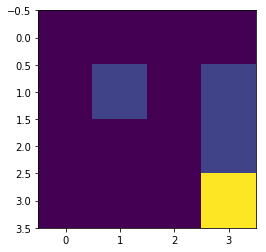

<IPython.core.display.Javascript object>

EPISODE: 3


""


Probability and Possible position for step 1: [(0.2, [2, 1]), (0.7, [3, 2]), (0.2, [1, 2])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 2: [(0.2, [2, 2]), (0.7, [3, 3]), (0.2, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 3: [(0.2, [2, 1]), (0.7, [3, 2]), (0.2, [1, 2])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probability and Possible position for step 4: [(0.2, [2, 2]), (0.7, [3, 3]), (0.2, [3, 1])]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No of steps taken: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

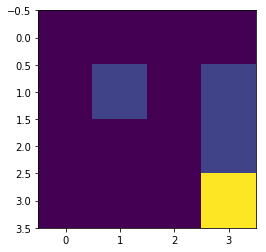

<IPython.core.display.Javascript object>

In [0]:
"""Listing out the possible positions for the agent at each episode, with highest learning curve."""
for episode in range(3):
  state = env.reset()
  total_reward = 0
  done = False
  print("EPISODE:",episode+1)
  nsteps = 0
  print_grid = widgets.Grid(1, 1)
  while not done:
    action = q_agent.steps(state, tradeoff, epsilon)
    new_state, reward, done, info = q_agent.env.steps(action)
    state = new_state
    nsteps+=1
    print("Probability and Possible position for step "+str(nsteps)+":",info)
    with print_grid.output_to(0, 0):
      print_grid.clear_cell()
      env.render()
    time.sleep(1)
  print("No of steps taken:",nsteps)
  
  with print_grid.output_to(0, 0):
    print_grid.clear_cell()
    env.render()
  time.sleep(1)

## Conclusion:

1. I was able to train the agent in deterministic model faster because of the lack of uncertainity. Whereas, in the case of stochastic approach the agent took more number of steps and trained slower.Uncertainity in the stochastic environment was introduced by assigning probabilities to different movements associated with each next step and randomising the agent's start position.

2. Q learning helped us achieve the same training for both environments, by storing cumulative rewards in the Q - table hence helping the agent to become more decisive.

## Acknowledgements:

I am thankful to Alina and the students who volunteered to share their knowledge about Reinforcement Learning, various types of Environments and the Q - Learning Algorithm.


## References:
[1] https://gym.openai.com/envs/FrozenLake-v0/

[2] http://gym.openai.com/docs/#spaces

[3] https://towardsdatascience.com/introduction-to-various-reinforcement-learning-algorithms-i-q-learning-sarsa-dqn-ddpg-72a5e0cb6287

[4] https://www.freecodecamp.org/news/an-introduction-to-q-learning-reinforcement-learning-14ac0b4493cc/

[5] https://learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

[6] https://en.wikipedia.org/wiki/Q-learning

[7] https://medium.com/@dennybritz/exploration-vs-exploitation-f46af4cf62fe

[8] https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py

[9] https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py

[10]https://www.deeplearningwizard.com/deep_learning/deep_reinforcement_learning_pytorch/dynamic_programming_frozenlake/


